Epoch 1/50
4/4 [==============================] - 1s 76ms/step - loss: 0.6924 - val_loss: 0.6910
Epoch 2/50
4/4 [==============================] - 0s 37ms/step - loss: 0.6901 - val_loss: 0.6882
Epoch 3/50
4/4 [==============================] - 0s 34ms/step - loss: 0.6869 - val_loss: 0.6842
Epoch 4/50
4/4 [==============================] - 0s 35ms/step - loss: 0.6823 - val_loss: 0.6783
Epoch 5/50
4/4 [==============================] - 0s 36ms/step - loss: 0.6755 - val_loss: 0.6700
Epoch 6/50
4/4 [==============================] - 0s 34ms/step - loss: 0.6661 - val_loss: 0.6587
Epoch 7/50
4/4 [==============================] - 0s 35ms/step - loss: 0.6536 - val_loss: 0.6442
Epoch 8/50
4/4 [==============================] - 0s 34ms/step - loss: 0.6378 - val_loss: 0.6263
Epoch 9/50
4/4 [==============================] - 0s 32ms/step - loss: 0.6186 - val_loss: 0.6049
Epoch 10/50
4/4 [==============================] - 0s 36ms/step - loss: 0.5957 - val_loss: 0.5800
Epoch 11/50
4/4 [============

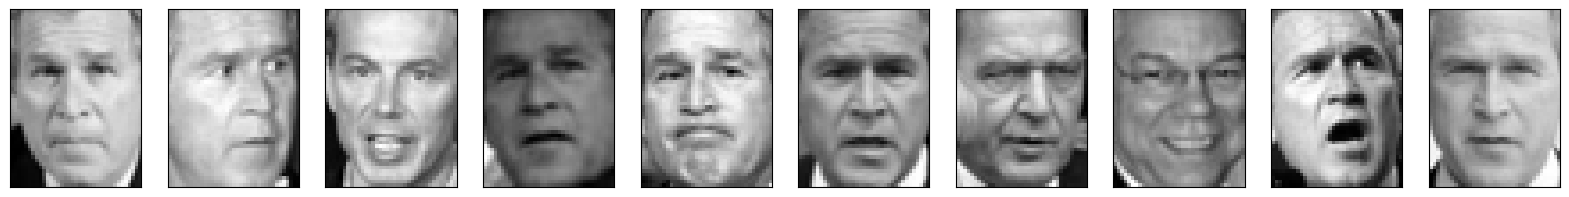

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

# Load the LFW dataset (Labeled Faces in the Wild)
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Split the dataset into training and testing sets
X_train, X_test, _, _ = train_test_split(lfw_people.data, lfw_people.target, test_size=0.25, random_state=42)

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Define the autoencoder model
encoding_dim = 64  # Size of the encoded representations
input_img = Input(shape=(X_train.shape[1],))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(X_train.shape[1], activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

# Create a separate encoder model
encoder = Model(input_img, encoded)

# Encode the test images
encoded_imgs = encoder.predict(X_test)

# Decode the encoded images
decoded_imgs = autoencoder.predict(X_test)

# Display original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 8))  # Adjusted figsize for two rows
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(50, 37), cmap='gray')  # Assuming images are 50x37 grayscale
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



plt.show()
